In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plyaer data load 및 정리(프로필)
player_df = pd.read_csv('./data/new/players_all.csv')
player_df = player_df.rename(columns={'Unnamed: 0':'Id'}).drop(['Id'], axis=1)

# 1xbet data load 및 정리(스텟)
xbet_df = pd.read_csv('./data/new/1xbet_all.csv')
xbet_df = xbet_df.drop(['Team','Age','Position'], axis=1).rename(columns={'Drb_x':'Drb_Off', 'Drb_y':'Drb_Def'})

# understat data load 및 정리(스텟)
understat_df = pd.read_csv('./data/new/understat_all.csv')
understat_df = understat_df.drop(['No','Team'], axis=1)

# capology load(연봉)
capology_df = pd.read_csv('./data/new/capology_all.csv')

# 프로필 + 연봉
eda_df = player_df.merge(capology_df[['Weekly Salary','Base Salary','ADJ Salary','Name', 'year']],
                         how='left', left_on=['Name', 'year'], right_on=['Name', 'year'])
eda_df = eda_df[~eda_df.duplicated(['year', 'Name'], keep='first')] # 중복 제거
# 프로필 + 연봉 + 스텟(understat)
eda_df = eda_df.merge(understat_df, how='left', left_on=['Name', 'year'], right_on=['Name', 'year'])
# 프로필 + 연봉 + 스텟(understat) + 스텟(1xbet)
eda_df = eda_df.merge(
    xbet_df[[
        'Name', 'year', 'SpG', 'KeyP', 'Drb_Off', 'Fouled', 'Off',
        'Disp', 'UnsTch', 'Rating', 'Tackles', 'Inter','Fouls',
        'Offsides', 'Clear', 'Drb_Def', 'Blocks', 'AvgP', 'PS%']],
    how='left',
    left_on=['Name', 'year'],
    right_on=['Name', 'year']
)

In [278]:
eda_df.columns

Index(['Player Id', 'Name', 'Birth Year', 'Age', 'Team', 'Position', 'year',
       'Weekly Salary', 'Base Salary', 'ADJ Salary', 'Apps', 'Min', 'G', 'NPG',
       'A', 'xG', 'NPxG', 'xA', 'xGChain', 'xGBuildup', 'xG90', 'NPxG90',
       'xA90', 'xG90+xA90', 'NPxG90+xA90', 'xGChain90', 'xGBuildup90', 'SpG',
       'KeyP', 'Drb_Off', 'Fouled', 'Off', 'Disp', 'UnsTch', 'Rating',
       'Tackles', 'Inter', 'Fouls', 'Offsides', 'Clear', 'Drb_Def', 'Blocks',
       'AvgP', 'PS%', 'xG + xA'],
      dtype='object')

# 포지션 별로 데이터 분석 지표를 찾아보자

## 공격의 마무리 작업에 기여한 정도와 득점 확률이 높은 빌드업에 가담한 정도
### 보다 정확한 분석을 위해 경기출전(Apps)이 10회 이상인 선수만 살핀다.

In [276]:
eda_df['xG + xA'] = eda_df['xG'] + df['xA']

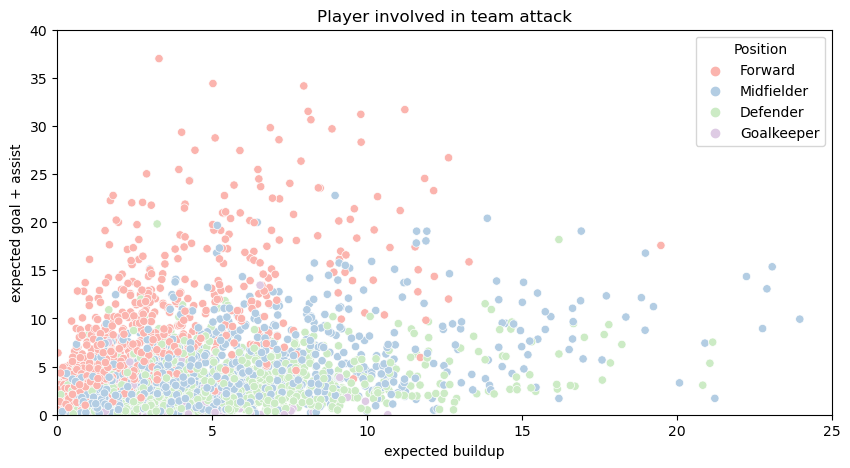

In [279]:
df_apps10 = eda_df[eda_df['Apps'] > 10]

plt.figure(figsize = (10, 5))
plt.xlabel('expected buildup')
plt.ylabel('expected goal + assist')
plt.title(f'Player involved in team attack')
plt.axis([0, 25, 0, 40])
sns.scatterplot(data = df_apps10, x = 'xGBuildup', y = 'xG + xA', hue = 'Position', palette = 'Pastel1')

plt.savefig('exBuildup_xG+xA.png')

# 선수 스탯과 연봉 비교하기

In [7]:
salary_path = './data/new/capology_all0.csv'
salary = pd.read_csv(salary_path)
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6140 entries, 0 to 6139
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              6140 non-null   object
 1   Weekly Salary     6140 non-null   int64 
 2   Base Salary       6140 non-null   int64 
 3   ADJ.Gross Salary  6140 non-null   int64 
 4   Team              6140 non-null   object
 5   year              6140 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 287.9+ KB


In [8]:
players_path = './data/new/players_all.csv'
players = pd.read_csv(players_path)
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4756 non-null   int64 
 1   No.         4756 non-null   int64 
 2   year        4756 non-null   int64 
 3   Name        4756 non-null   object
 4   Age         4756 non-null   int64 
 5   Team        4756 non-null   object
 6   Position    4756 non-null   object
dtypes: int64(4), object(3)
memory usage: 260.2+ KB


In [9]:
# 데이터가 players에 없거나 salary에 없는 경우가 있기에 그런 경우를 제외하기 위해 inner join
player_salary = pd.merge(players, salary, left_on = ['Name', 'year'], right_on = ['Name', 'year'], how = 'inner')
player_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4597 entries, 0 to 4596
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        4597 non-null   int64 
 1   No.               4597 non-null   int64 
 2   year              4597 non-null   int64 
 3   Name              4597 non-null   object
 4   Age               4597 non-null   int64 
 5   Team_x            4597 non-null   object
 6   Position          4597 non-null   object
 7   Weekly Salary     4597 non-null   int64 
 8   Base Salary       4597 non-null   int64 
 9   ADJ.Gross Salary  4597 non-null   int64 
 10  Team_y            4597 non-null   object
dtypes: int64(7), object(4)
memory usage: 431.0+ KB


In [10]:
# 선수 기본 정보와 연봉 데이터만 가지도록 수정
player_salary = player_salary[['No.', 'year', 'Name', 'Age', 'Team_x', 'Position', 'Weekly Salary']]
player_salary.head()

,No.,year,Name,Age,Team_x,Position,Weekly Salary
0,450,2014,Eden Hazard,23,Chelsea,Forward,185827
1,74,2014,Alexis Sanchez,25,Arsenal,Forward,140000
2,1508,2014,Sergio Aguero,26,Man City,Forward,160000
3,261,2014,Cesc Fabregas,27,Chelsea,Midfielder,171481
4,1480,2014,Santi Cazorla,29,Arsenal,Midfielder,90000


In [11]:
# 동일한 중복 선수 제거
player_salary = player_salary[~player_salary.duplicated(['year', 'Name'], keep='first')]

In [12]:
player_salary[player_salary['Name'] == 'Eden Hazard']

,No.,year,Name,Age,Team_x,Position,Weekly Salary
0,450,2014,Eden Hazard,23,Chelsea,Forward,185827
614,450,2015,Eden Hazard,24,Chelsea,Forward,178577
1089,450,2016,Eden Hazard,25,Chelsea,Forward,215346
1631,450,2017,Eden Hazard,26,Chelsea,Forward,222865
2145,450,2018,Eden Hazard,27,Chelsea,Forward,224423


In [13]:
# 1xbet 데이터를 불러와 salary와 rating간의 연관성을 확인
bet.head()

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,SpG,KeyP,...,UnsTch,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb_y,Blocks,year
0,Eden Hazard,Chelsea,32,Forward,38,3379,14,9,2.052632,2.631579,...,2.105263,7.956842,0.736842,0.578947,0.315789,0.0,0.236842,0.605263,0.026316,2014
1,Alexis Sanchez,Arsenal,34,Forward,35,2953,16,8,3.485714,2.342857,...,2.114286,7.810857,1.971429,1.171429,1.257143,0.0,0.171429,1.542857,0.000000,2014
2,Sergio Aguero,Man City,35,Forward,33,2540,26,8,4.484848,1.000000,...,1.939394,7.671515,0.666667,0.393939,0.545455,0.0,0.060606,0.515152,0.000000,2014
3,Cesc Fabregas,Chelsea,36,Midfielder,34,2890,3,18,1.264706,2.794118,...,1.000000,7.618529,2.588235,0.676471,0.882353,0.0,0.882353,2.117647,0.147059,2014
4,Santi Cazorla,Arsenal,38,Midfielder,37,2992,7,11,2.513514,2.108108,...,1.000000,7.599459,1.594595,1.081081,0.540541,0.0,0.648649,1.459459,0.135135,2014


In [14]:
# merge를 위한 데이터와 Rating, Apps 값만 추출
rating = bet[['Name', 'year', 'Apps','Rating']]
rating

,Name,year,Apps,Rating
0,Eden Hazard,2014,38,7.956842
1,Alexis Sanchez,2014,35,7.810857
2,Sergio Aguero,2014,33,7.671515
3,Cesc Fabregas,2014,34,7.618529
4,Santi Cazorla,2014,37,7.599459
...,...,...,...,...
4751,Chris Wood,2022,25,6.295200
4752,Danny Ings,2022,35,6.457429
4753,Daniel James,2022,24,6.292917
4754,Craig Dawson,2022,25,6.553600


In [15]:
# player_salary와 rating 데이터 merge
salary_rating = pd.merge(player_salary, rating, left_on = ['Name', 'year'], right_on = ['Name', 'year'])
salary_rating.head()

,No.,year,Name,Age,Team_x,Position,Weekly Salary,Apps,Rating
0,450,2014,Eden Hazard,23,Chelsea,Forward,185827,38,7.956842
1,74,2014,Alexis Sanchez,25,Arsenal,Forward,140000,35,7.810857
2,1508,2014,Sergio Aguero,26,Man City,Forward,160000,33,7.671515
3,261,2014,Cesc Fabregas,27,Chelsea,Midfielder,171481,34,7.618529
4,1480,2014,Santi Cazorla,29,Arsenal,Midfielder,90000,37,7.599459


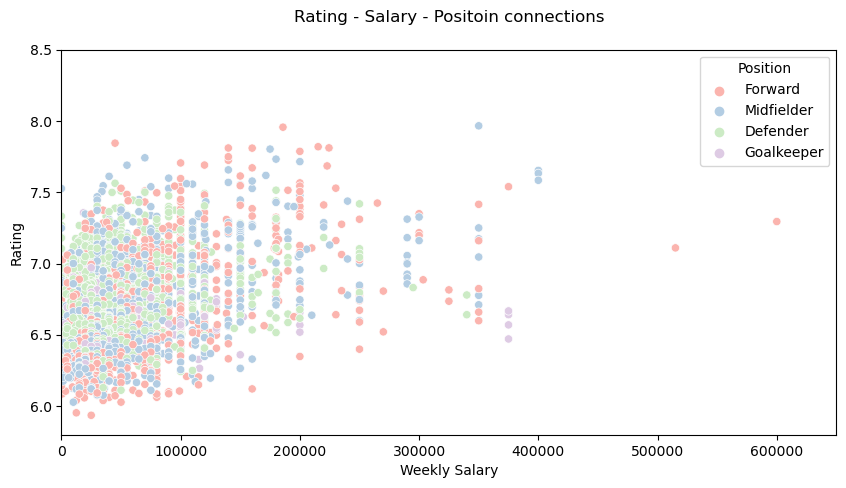

In [44]:
# Rating점수와 Salary의 관계성

# 10번 이상 출전 한 선수만 확인
apps_over10 = salary_rating[salary_rating['Apps'] > 10]

plt.figure(figsize = (10, 5))
plt.title('Rating - Salary - Positoin connections', pad = 20)
plt.axis([0, 650000, 5.8, 8.5])
sns.scatterplot(data = apps_over10, y = 'Rating', x = 'Weekly Salary', hue = 'Position', palette = 'Pastel1')
plt.show()

# understat 데이터의 기대수치들과 연봉의 관계를 확인해보기

In [17]:
# understat 데이터와 연봉과의 관계성
understat.head()

,No,Name,Team,Apps,Min,G,NPG,A,xG,NPxG,...,xGChain,xGBuildup,xG90,NPxG90,xA90,xG90+xA90,NPxG90+xA90,xGChain90,xGBuildup90,year
0,619,Sergio Aguero,Manchester City,33,2551,26,21,8,25.27,20.70,...,27.81,6.88,0.89,0.73,0.20,1.09,0.93,0.98,0.24,2014
1,647,Harry Kane,Tottenham,34,2589,21,19,4,17.16,14.87,...,16.49,5.55,0.60,0.52,0.14,0.73,0.65,0.57,0.19,2014
2,802,Diego Costa,Chelsea,26,2111,20,19,3,15.22,14.46,...,21.37,5.28,0.65,0.62,0.19,0.84,0.81,0.91,0.22,2014
3,848,Charlie Austin,Queens Park Rangers,35,3078,18,15,5,17.88,14.08,...,13.72,3.04,0.52,0.41,0.07,0.60,0.49,0.40,0.09,2014
4,498,Alexis Sanchez,Arsenal,35,2967,16,16,8,13.45,12.69,...,27.16,10.74,0.41,0.38,0.26,0.67,0.64,0.82,0.33,2014


In [18]:
player_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4451 entries, 0 to 4596
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   No.            4451 non-null   int64 
 1   year           4451 non-null   int64 
 2   Name           4451 non-null   object
 3   Age            4451 non-null   int64 
 4   Team_x         4451 non-null   object
 5   Position       4451 non-null   object
 6   Weekly Salary  4451 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 278.2+ KB


In [19]:
salary_understat = pd.merge(player_salary, understat, left_on = ['Name', 'year'], right_on = ['Name', 'year']
                            , how = 'inner')
salary_understat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4448 entries, 0 to 4447
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No.            4448 non-null   int64  
 1   year           4448 non-null   int64  
 2   Name           4448 non-null   object 
 3   Age            4448 non-null   int64  
 4   Team_x         4448 non-null   object 
 5   Position       4448 non-null   object 
 6   Weekly Salary  4448 non-null   int64  
 7   No             4448 non-null   int64  
 8   Team           4448 non-null   object 
 9   Apps           4448 non-null   int64  
 10  Min            4448 non-null   int64  
 11  G              4448 non-null   int64  
 12  NPG            4448 non-null   int64  
 13  A              4448 non-null   int64  
 14  xG             4448 non-null   float64
 15  NPxG           4448 non-null   float64
 16  xA             4448 non-null   float64
 17  xGChain        4448 non-null   float64
 18  xGBuildu

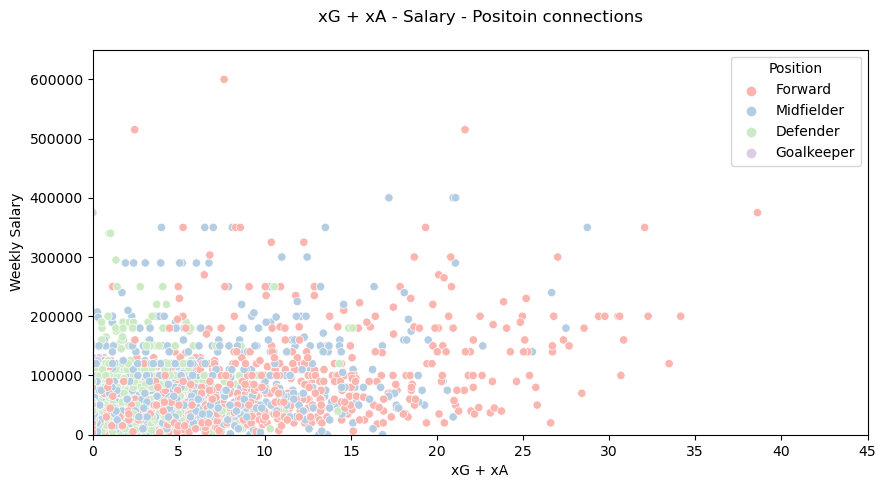

In [26]:
# x값들과 Salary의 관계성
plt.figure(figsize = (10, 5))
plt.axis([0, 45, 0, 650000])
plt.title('xG + xA - Salary - Positoin connections', pad = 20)
sns.scatterplot(data = salary_understat, x = 'xG + xA', y = 'Weekly Salary', hue = 'Position', palette = 'Pastel1')
plt.show()

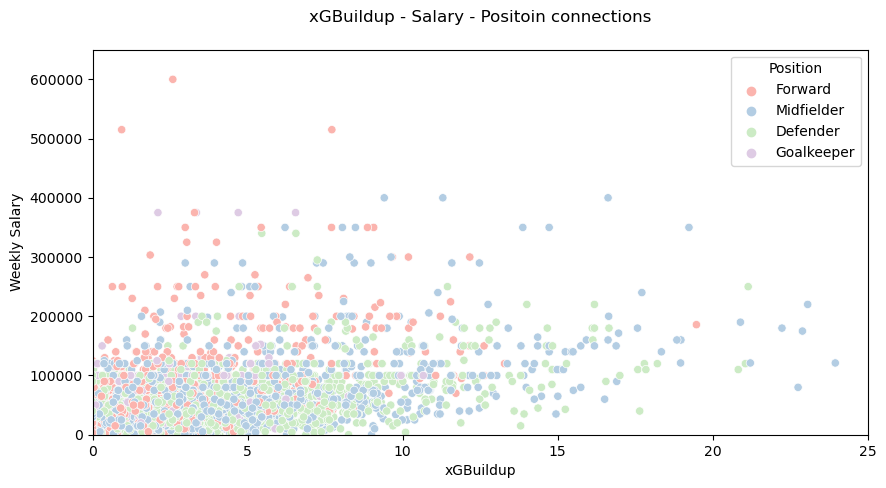

In [28]:
# xGBuildup와 Salary의 관계성
plt.figure(figsize = (10, 5))
plt.axis([0, 25, 0, 650000])
plt.title('xGBuildup - Salary - Positoin connections', pad = 20)
sns.scatterplot(data = salary_understat, x = 'xGBuildup', y = 'Weekly Salary', hue = 'Position', palette = 'Pastel1')
plt.show()

# 각 포지션 별 지표 정하기

### 공격수 G, xG, A, xA, ...
### 미드필더 A, xA, xGBuildup, KeyP, ...
### 수비수 xGBuildup, Tackles, Inter, Offsides, Clear, Blocks

In [29]:
player_salary = player_salary.rename(columns = {'Team_x' : 'Team'})
player_salary.columns

Index(['No.', 'year', 'Name', 'Age', 'Team', 'Position', 'Weekly Salary'], dtype='object')

In [136]:
bet.columns

Index(['Name', 'Team', 'Age', 'Position', 'Apps', 'Mins', 'Goals', 'Assists',
       'SpG', 'KeyP', 'Drb_x', 'Fouled', 'Off', 'Disp', 'UnsTch', 'Rating',
       'Tackles', 'Inter', 'Fouls', 'Offsides', 'Clear', 'Drb_y', 'Blocks',
       'AvgP', 'PS%', 'year'],
      dtype='object')

In [31]:
# Goal, Assist, 기준
understat.columns

Index(['No', 'Name', 'Team', 'Apps', 'Min', 'G', 'NPG', 'A', 'xG', 'NPxG',
       'xA', 'xGChain', 'xGBuildup', 'xG90', 'NPxG90', 'xA90', 'xG90+xA90',
       'NPxG90+xA90', 'xGChain90', 'xGBuildup90', 'year'],
      dtype='object')

In [244]:
bet_copy = bet
bet_copy = bet_copy.drop(columns = ['Team', 'Age', 'Position', 'Goals', 'Assists'])
salary_bet = pd.merge(player_salary, bet_copy, on = ['Name', 'year'], how = 'inner')

understat_copy = understat
understat_copy = understat_copy.drop(columns = ['Team', 'Apps'])
total_table = pd.merge(salary_bet, understat_copy, on = ['Name', 'year'], how = 'inner')
total_table.describe()

,No.,year,Age,Weekly Salary,Apps,Mins,SpG,KeyP,Drb_x,Fouled,...,xA,xGChain,xGBuildup,xG90,NPxG90,xA90,xG90+xA90,NPxG90+xA90,xGChain90,xGBuildup90
count,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,...,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000,4448.000000
mean,857.129946,2017.933903,25.951214,54351.818795,20.654901,1472.743930,0.762192,0.557019,0.580304,0.648174,...,1.463147,5.557920,3.306434,0.138381,0.131803,0.091385,0.229793,0.223204,0.355344,0.203685
std,504.629703,2.598739,4.216227,52907.739506,11.468843,1026.113393,0.715497,0.535435,0.608583,0.510329,...,1.991158,5.694676,3.396437,0.253636,0.248040,0.218019,0.354509,0.349511,0.404813,0.269573
min,1.000000,2014.000000,15.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,406.750000,2016.000000,23.000000,22000.000000,11.000000,549.000000,0.250000,0.151136,0.137931,0.272727,...,0.100000,1.307500,0.740000,0.010000,0.010000,0.010000,0.050000,0.050000,0.150000,0.090000
50%,841.000000,2018.000000,26.000000,40000.000000,22.000000,1405.500000,0.575758,0.436141,0.419355,0.555556,...,0.720000,3.785000,2.360000,0.060000,0.060000,0.060000,0.130000,0.130000,0.290000,0.160000
75%,1299.000000,2020.000000,29.000000,70000.000000,31.000000,2323.500000,1.077692,0.818182,0.833333,0.928571,...,2.050000,8.000000,4.770000,0.180000,0.170000,0.130000,0.330000,0.320000,0.460000,0.260000
max,1734.000000,2022.000000,41.000000,600000.000000,38.000000,3450.000000,4.972973,4.171429,5.037037,4.638889,...,20.620000,37.800000,23.960000,7.010000,7.010000,8.940000,8.940000,8.940000,8.940000,8.940000


In [281]:
eda_df.columns

Index(['Player Id', 'Name', 'Birth Year', 'Age', 'Team', 'Position', 'year',
       'Weekly Salary', 'Base Salary', 'ADJ Salary', 'Apps', 'Min', 'G', 'NPG',
       'A', 'xG', 'NPxG', 'xA', 'xGChain', 'xGBuildup', 'xG90', 'NPxG90',
       'xA90', 'xG90+xA90', 'NPxG90+xA90', 'xGChain90', 'xGBuildup90', 'SpG',
       'KeyP', 'Drb_Off', 'Fouled', 'Off', 'Disp', 'UnsTch', 'Rating',
       'Tackles', 'Inter', 'Fouls', 'Offsides', 'Clear', 'Drb_Def', 'Blocks',
       'AvgP', 'PS%', 'xG + xA'],
      dtype='object')

### 포지션 별 상관 계수

In [293]:
corr_table = eda_df[['ADJ Salary', 'Apps', 'Position', 
                   'G', 'xG', 'A', 'xA', 'xGBuildup', 'NPG', 'SpG',
                   'KeyP', 'Drb_Off', 'Disp', 'UnsTch',
                   'Tackles', 'Inter', 'Fouls', 'Clear', 'Drb_Def', 'Blocks',
                   'AvgP', 'PS%']]

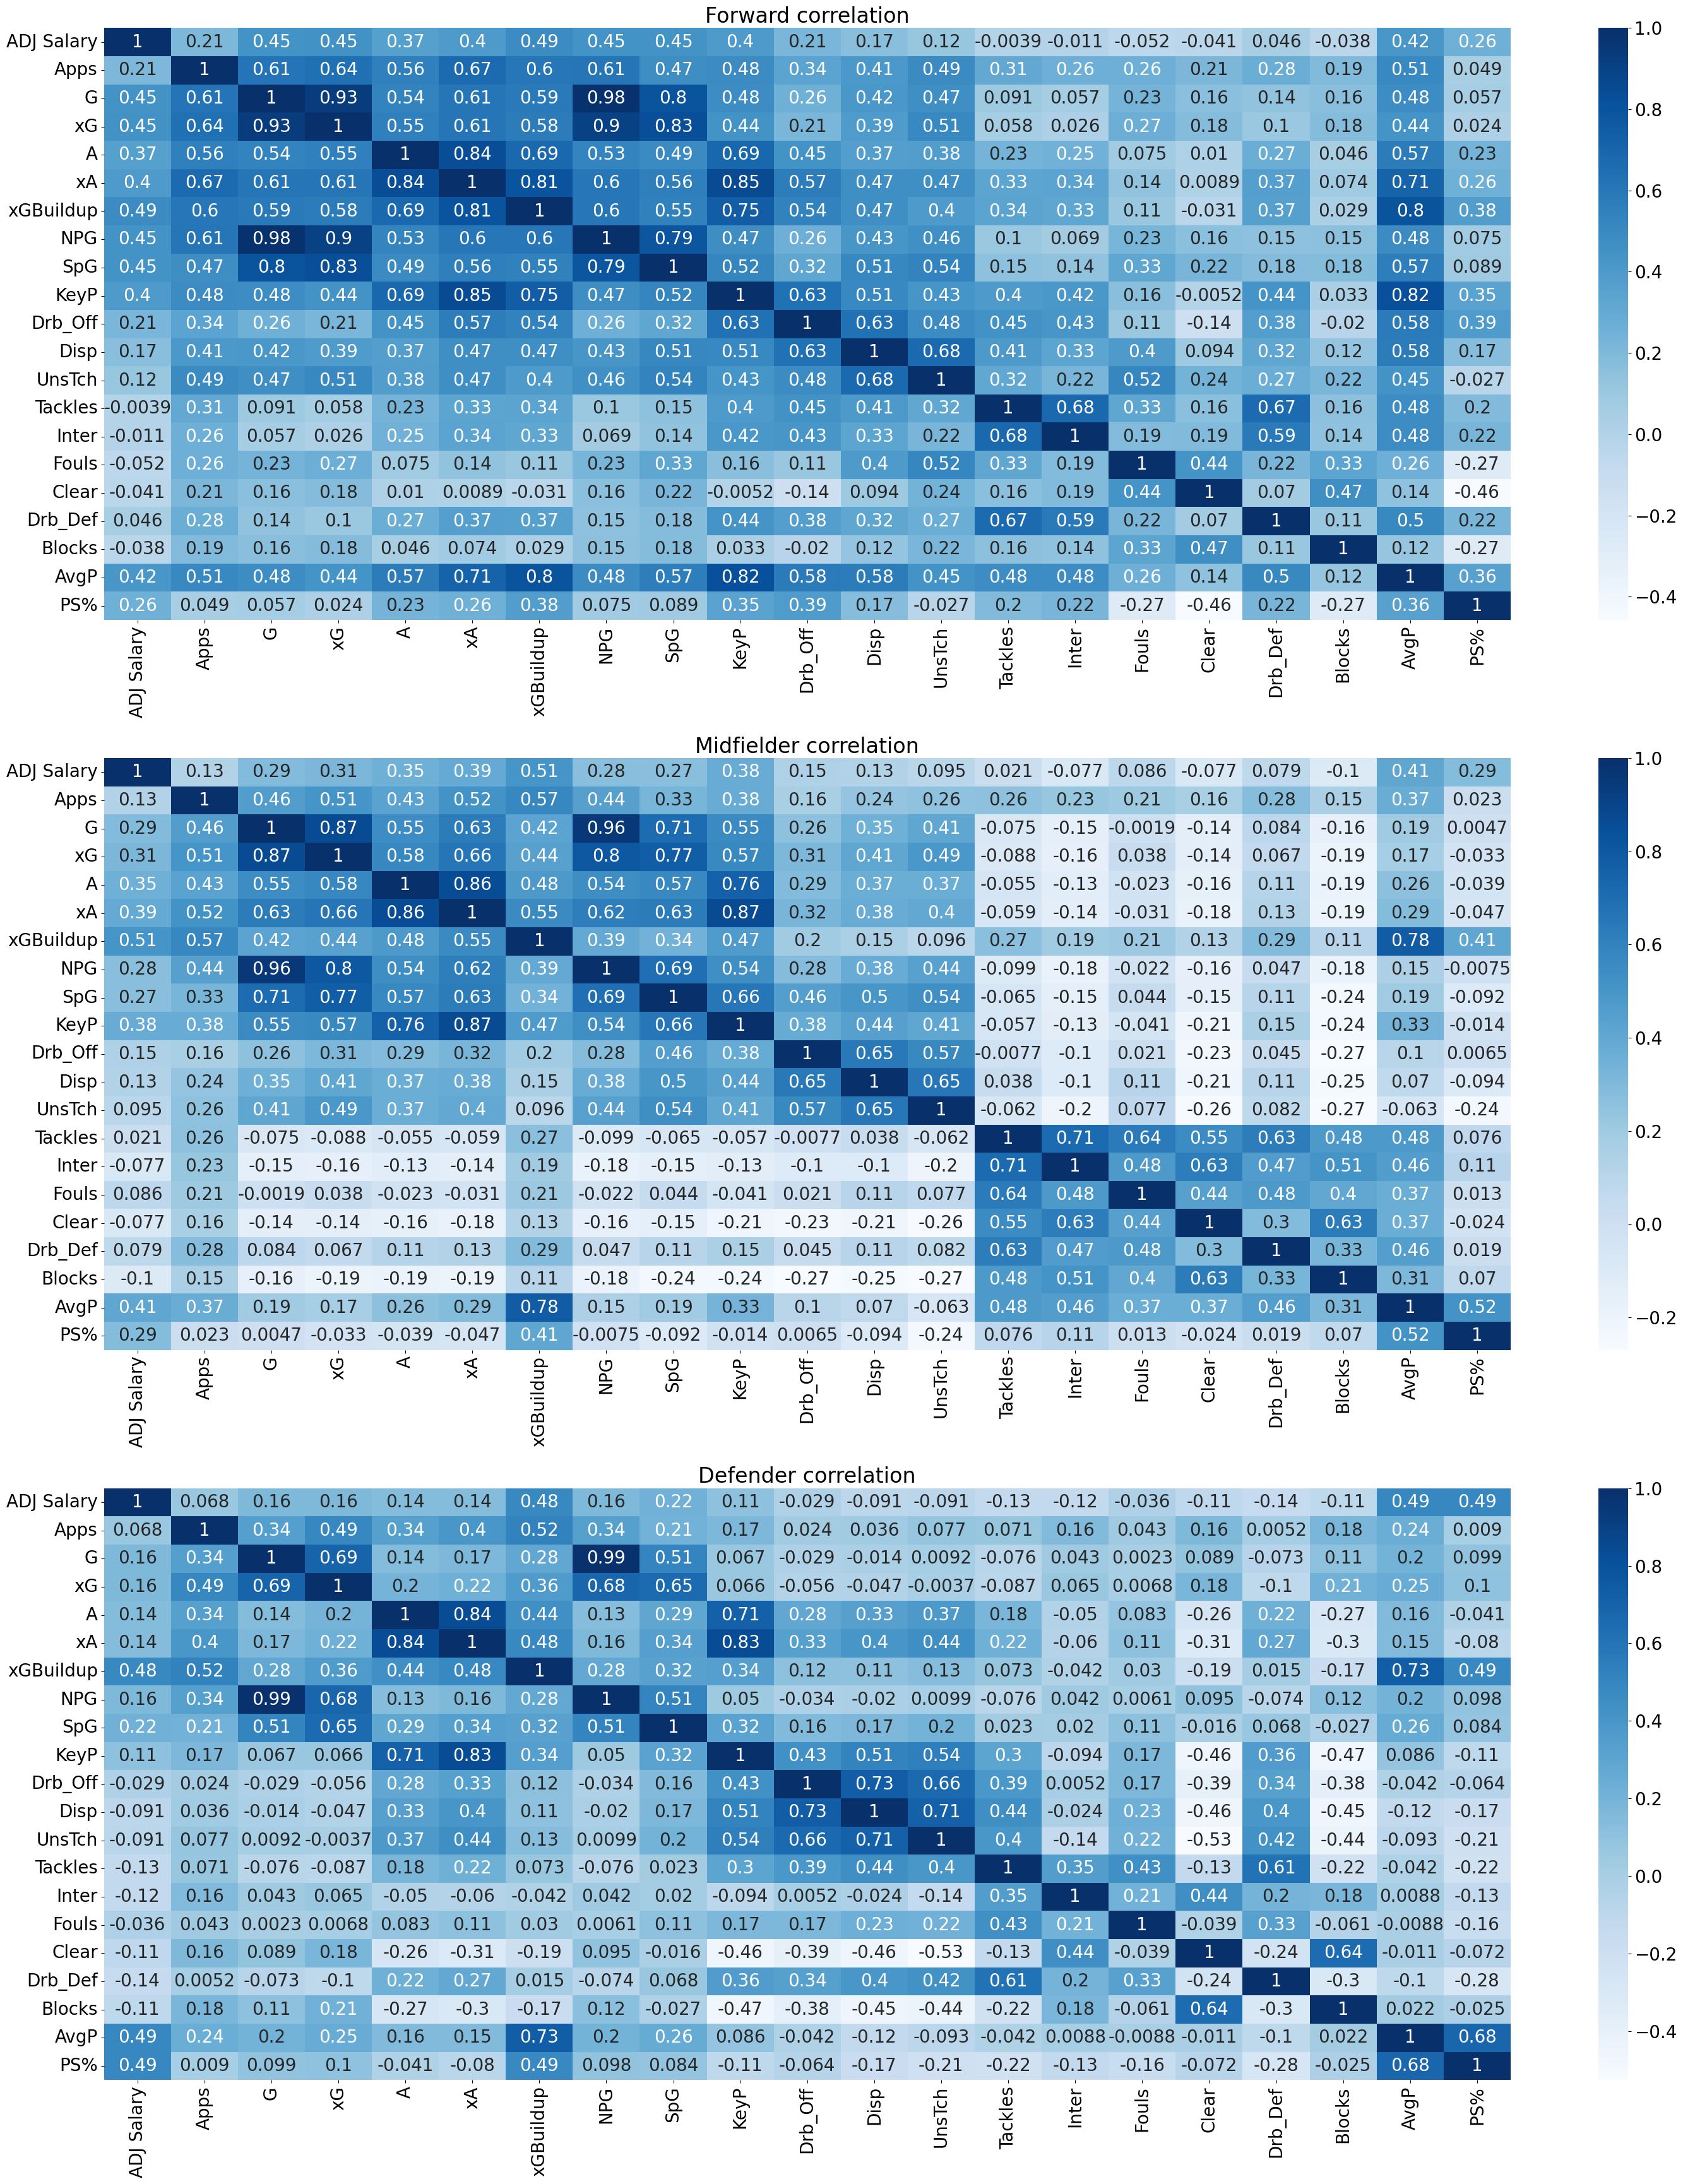

In [294]:
positions = ['Forward', 'Midfielder', 'Defender']

df_apps10 = corr_table[corr_table['Apps'] > 10]

plt.figure(figsize = (30, 35))
plt.rc('font', size= 20) 

for i in range(0, 3):
    corr_position = df_apps10[df_apps10['Position'] == positions[i]].drop(columns = ['Position'])

    plt.subplot(3, 1, (i + 1))
    plt.title(f'{positions[i]} correlation')
    sns.heatmap(corr_position.corr(), cmap = 'Blues', annot = True)

plt.tight_layout()
# plt.show()
plt.savefig('corr.png')

### 공격수 스탯과 연봉 비교

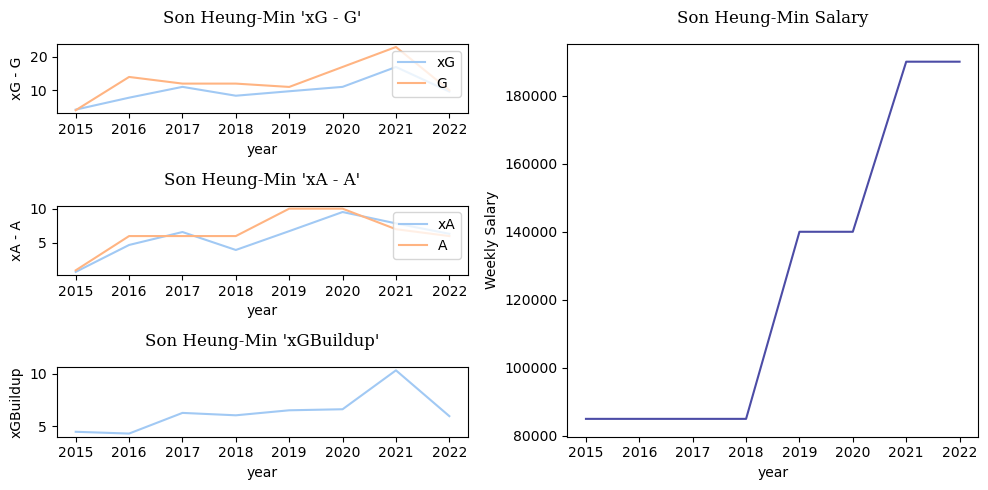

In [299]:
# 공격 지표와 연봉 비교
player_name = "Son Heung-Min"
one_player = eda_df[eda_df['Name'] == player_name]

plt.figure(figsize = (10, 5))
plt.rc('font', size= 10) 

# xG - G
sns.set_palette('pastel')
plt.subplot(3, 2, 1)
plt.title(f'{player_name} \'xG - G\'', pad = 15, fontfamily = 'serif')
plt.ylabel('xG - G')

plt.xticks(one_player['year'].unique())
sns.lineplot(data = one_player, x = 'year', y = 'xG', label = 'xG')
sns.lineplot(data = one_player, x = 'year', y = 'G', label = 'G')
plt.legend(loc = 'upper right')

# xA - A
sns.set_palette('pastel')
plt.subplot(3, 2, 3)
plt.title(f'{player_name} \'xA - A\'', pad = 15, fontfamily = 'serif')
plt.ylabel('xA - A')

plt.xticks(one_player['year'].unique())
sns.lineplot(data = one_player, x = 'year', y = 'xA', label = 'xA')
sns.lineplot(data = one_player, x = 'year', y = 'A', label = 'A')
plt.legend(loc = 'upper right')

# xGBuildup
plt.subplot(3, 2, 5)
sns.set_palette('pastel')
plt.title(f'{player_name} \'xGBuildup\'', pad = 15, fontfamily = 'serif')
plt.ylabel('xGBuildup')

plt.xticks(one_player['year'].unique())
sns.lineplot(data = one_player, x = 'year', y = 'xGBuildup')

# Salary
plt.subplot(1, 2, 2)
plt.title(f'{player_name} Salary', pad = 15, fontfamily = 'serif')

plt.xticks(one_player['year'].unique())
sns.lineplot(data = one_player, x = 'year', y = 'Weekly Salary', color = 'navy', alpha = 0.7)

plt.tight_layout()
# plt.show()
plt.savefig(f'{player_name} stat - salary')

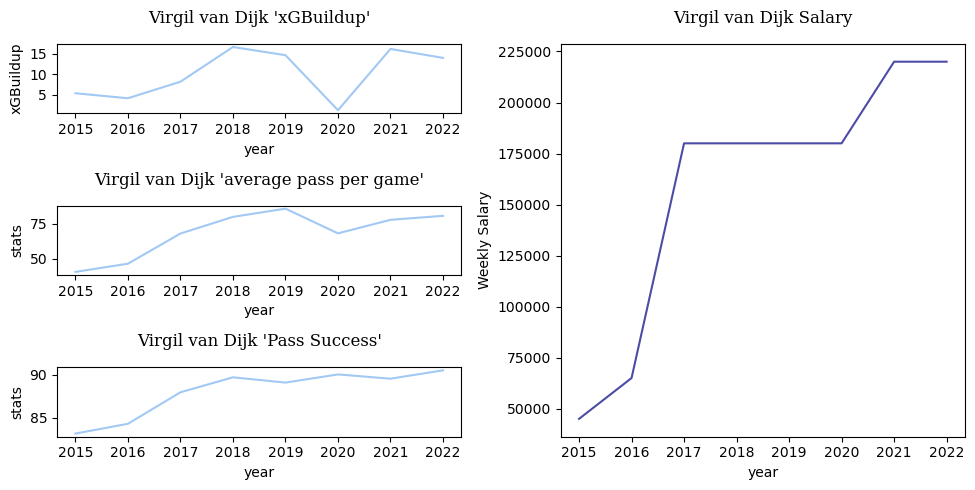

In [302]:
# 수비 지표와 연봉 데이터
player_name = "Virgil van Dijk"
one_player = total_table[total_table['Name'] == player_name]

plt.figure(figsize = (10, 5))
plt.rc('font', size= 10) 

# xGBuildup
plt.subplot(3, 2, 1)
sns.set_palette('pastel')
plt.title(f'{player_name} \'xGBuildup\'', pad = 15, fontfamily = 'serif')
plt.ylabel('xGBuildup')

plt.xticks(one_player['year'].unique())
sns.lineplot(data = one_player, x = 'year', y = 'xGBuildup')

# AvgP
plt.subplot(3, 2, 3)
sns.set_palette('pastel')
plt.title(f'{player_name} \'average pass per game\'', pad = 15, fontfamily = 'serif')

plt.xticks(one_player['year'].unique())
plt.ylabel('stats')
sns.lineplot(data = one_player, x = 'year', y = 'AvgP')
# plt.legend(loc = 'upper right')

# Pass Success
plt.subplot(3, 2, 5)
sns.set_palette('pastel')
plt.title(f'{player_name} \'Pass Success\'', pad = 15, fontfamily = 'serif')

plt.xticks(one_player['year'].unique())
plt.ylabel('stats')
sns.lineplot(data = one_player, x = 'year', y = 'PS%')


# Salary
plt.subplot(1, 2, 2)
plt.title(f'{player_name} Salary', pad = 15, fontfamily = 'serif')

plt.xticks(one_player['year'].unique())
sns.lineplot(data = one_player, x = 'year', y = 'Weekly Salary', color = 'navy', alpha = 0.7)

plt.tight_layout()
plt.show()